In this notebook, I am going to generate a list of companies called Dividend Aristocrats. There are some requirements for companies to be selected in the group of Dividend Aristocrats, I will make the process simple by selecting companies in S&P 500 which have paid out dividends at least 25 years. I can add more requirements on top of the threshold of 25 years.

In [15]:
import json
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader

## Load Annual Dividend Data from JSON

In [2]:
with open('data/historical_div_sp500.json', 'r') as fp:
    div_data = json.load(fp)

In [3]:
div_data

{'MMM': [{'1970': 0.082,
   '1971': 0.115752,
   '1972': 0.120376,
   '1973': 0.13125,
   '1974': 0.1565,
   '1975': 0.16875,
   '1976': 0.181,
   '1977': 0.2125,
   '1978': 0.25,
   '1979': 0.3,
   '1980': 0.35,
   '1981': 0.375,
   '1982': 0.4,
   '1983': 0.4125,
   '1984': 0.425,
   '1985': 0.4375,
   '1986': 0.45,
   '1987': 0.465,
   '1988': 0.53,
   '1989': 0.65,
   '1990': 0.73,
   '1991': 0.78,
   '1992': 0.8,
   '1993': 0.83,
   '1994': 0.88,
   '1995': 0.94,
   '1996': 2.16,
   '1997': 1.06,
   '1998': 1.1,
   '1999': 1.12,
   '2000': 1.16,
   '2001': 1.2,
   '2002': 1.24,
   '2003': 1.32,
   '2004': 1.44,
   '2005': 1.68,
   '2006': 1.84,
   '2007': 1.92,
   '2008': 2.0,
   '2009': 2.04,
   '2010': 2.1,
   '2011': 2.2,
   '2012': 2.36,
   '2013': 2.54,
   '2014': 3.42,
   '2015': 4.1,
   '2016': 4.44,
   '2017': 4.7,
   '2018': 5.44,
   '2019': 5.76,
   '2020': 5.88},
  {'consecutive_yrs': 51,
   '5YrsDivGrowthAvg': 13.198230876467122,
   '15YrsDivGrowthAvg': 9.4580247835039

In [4]:
df_convert = {
    'Symbol': [],
    'Div Yield': [],
    '5YrsDivGrowthAvg': [],
    '15YrsDivGrowthAvg': [],
    'Consecutive Years of Dividend Pay': []
}

In [5]:
startDate = dt.datetime.today() - dt.timedelta(days=1)
endDate = dt.datetime.today()
last_year = dt.datetime.today().year - 1

for symbol in div_data.keys():
    df_convert['Symbol'].append(symbol)
    recent_close = DataReader(symbol, 'yahoo', startDate,
                              endDate)['Adj Close'][-1]
    df_convert['Div Yield'].append(100 * div_data[symbol][0][str(last_year)] /
                                   recent_close)
    df_convert['5YrsDivGrowthAvg'].append(
        div_data[symbol][1]['5YrsDivGrowthAvg'])
    df_convert['15YrsDivGrowthAvg'].append(
        div_data[symbol][1]['15YrsDivGrowthAvg'])
    df_convert['Consecutive Years of Dividend Pay'].append(
    div_data[symbol][1]['consecutive_yrs'])

In [12]:
df = pd.DataFrame(df_convert)
df.set_index('Symbol', inplace=True)
df = df[(df['5YrsDivGrowthAvg'] > 0) & (df['15YrsDivGrowthAvg'] > 0)]
df = df.sort_values(by=['Div Yield', '5YrsDivGrowthAvg', '5YrsDivGrowthAvg'], ascending=False)
df

,Div Yield,5YrsDivGrowthAvg,15YrsDivGrowthAvg,Consecutive Years of Dividend Pay
Symbol,,,,
OKE,7.307542,17.741183,16.624137,36
T,6.862422,2.086961,2.562009,37
WMB,6.514658,4.534995,34.553314,39
MO,6.476190,9.239685,46.396783,59
XOM,6.030151,5.112112,7.815625,59
...,...,...,...,...
MAR,0.326931,6.054513,20.594374,23
DHR,0.318204,897.570728,380.154187,28
LUV,0.293686,17.972432,27.778564,41


## Dividend Aristocrats

In [13]:
div_aristrocrats = df[df['Consecutive Years of Dividend Pay'] >= 25]
div_aristrocrats

,Div Yield,5YrsDivGrowthAvg,15YrsDivGrowthAvg,Consecutive Years of Dividend Pay
Symbol,,,,
OKE,7.307542,17.741183,16.624137,36
T,6.862422,2.086961,2.562009,37
WMB,6.514658,4.534995,34.553314,39
MO,6.476190,9.239685,46.396783,59
XOM,6.030151,5.112112,7.815625,59
...,...,...,...,...
TJX,0.348274,7.869669,17.031839,34
DHR,0.318204,897.570728,380.154187,28
LUV,0.293686,17.972432,27.778564,41


## Dividend Kings

In [14]:
div_kings = df[df['Consecutive Years of Dividend Pay'] >= 50]
div_kings

,Div Yield,5YrsDivGrowthAvg,15YrsDivGrowthAvg,Consecutive Years of Dividend Pay
Symbol,,,,
MO,6.476190,9.239685,46.396783,59
XOM,6.030151,5.112112,7.815625,59
IBM,4.773427,8.546533,15.163096,59
ED,4.110693,3.167671,1.858180,59
IP,3.723462,7.678018,10.577710,59
AEP,3.341570,5.521578,3.381951,51
DTE,3.095166,6.913511,4.216519,59
KO,3.092006,5.624242,8.088648,59
MMM,3.017241,13.198231,9.458025,51


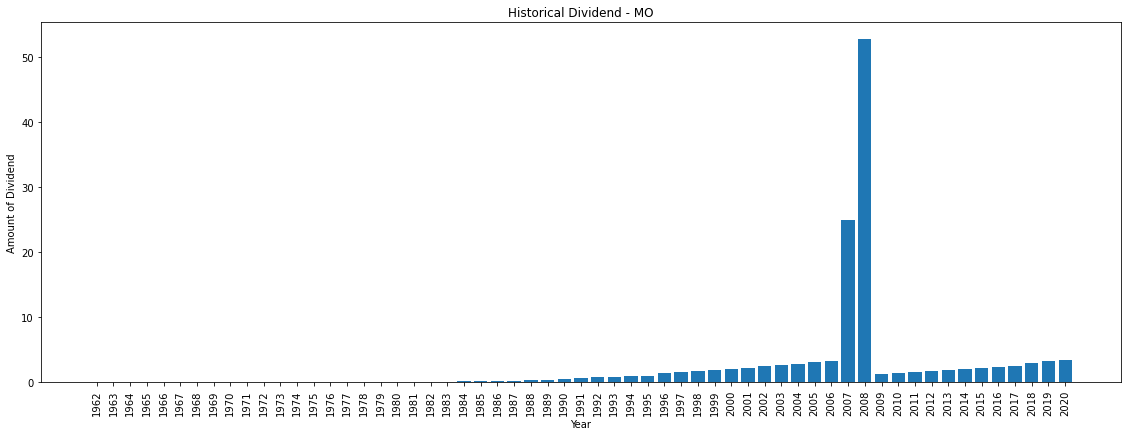

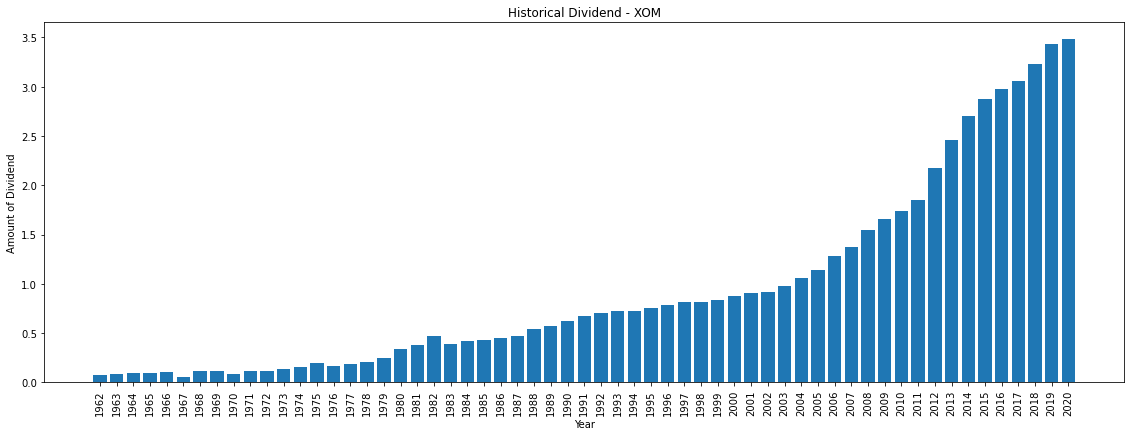

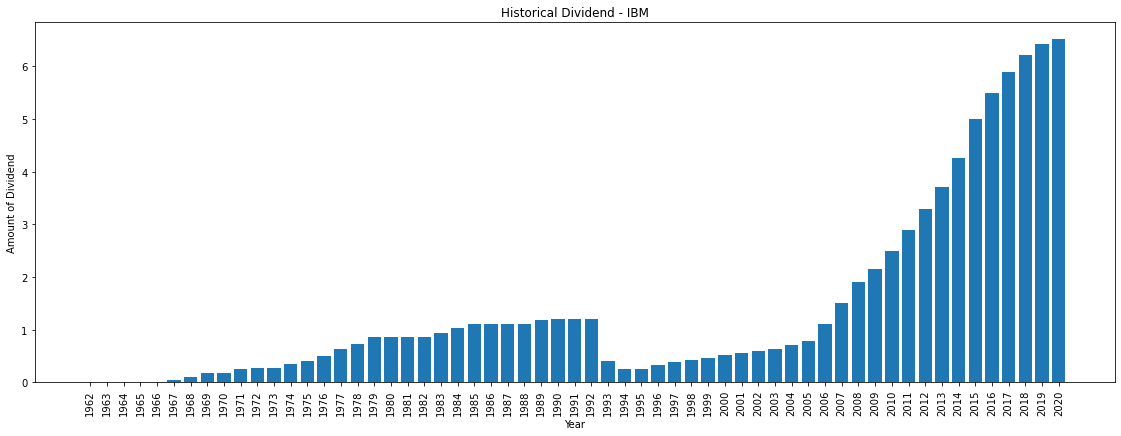

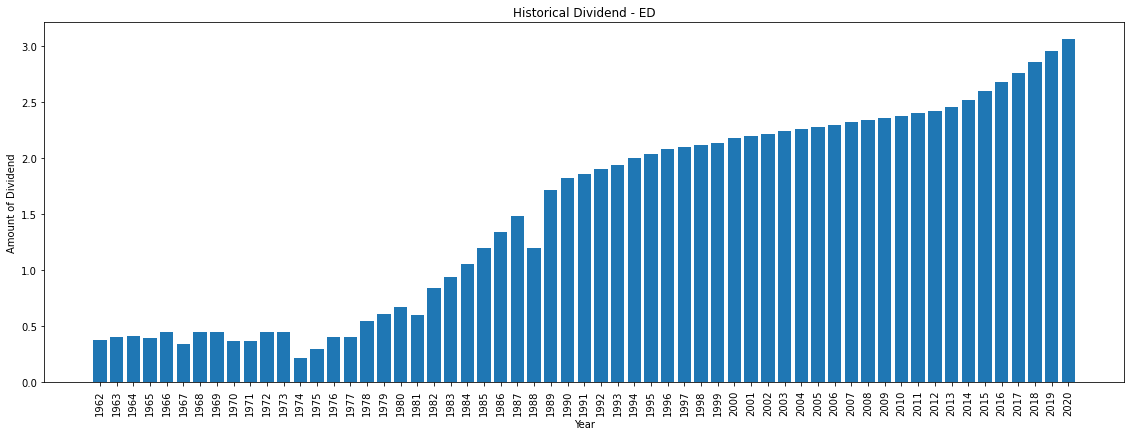

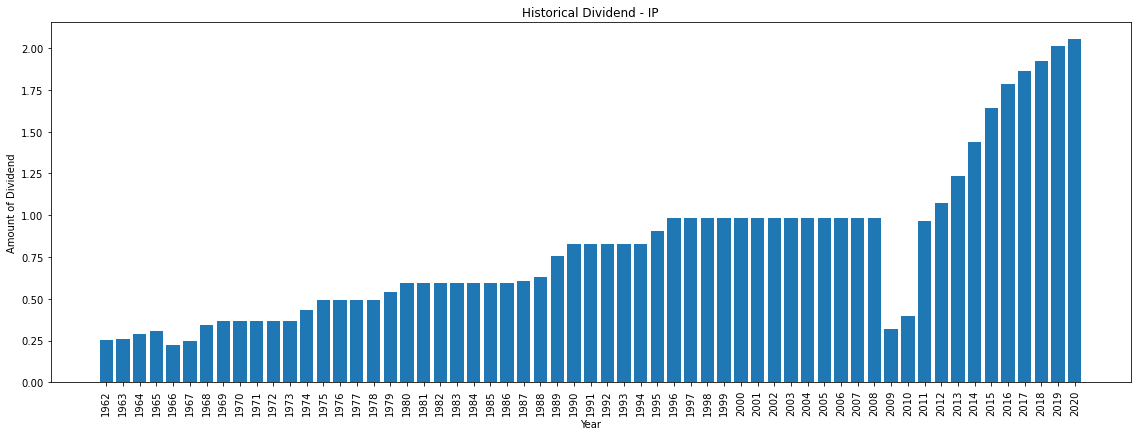

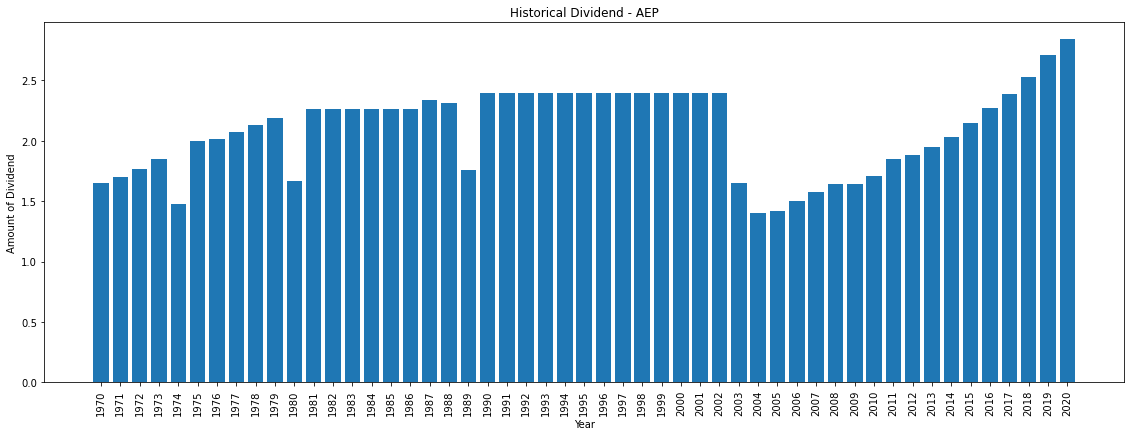

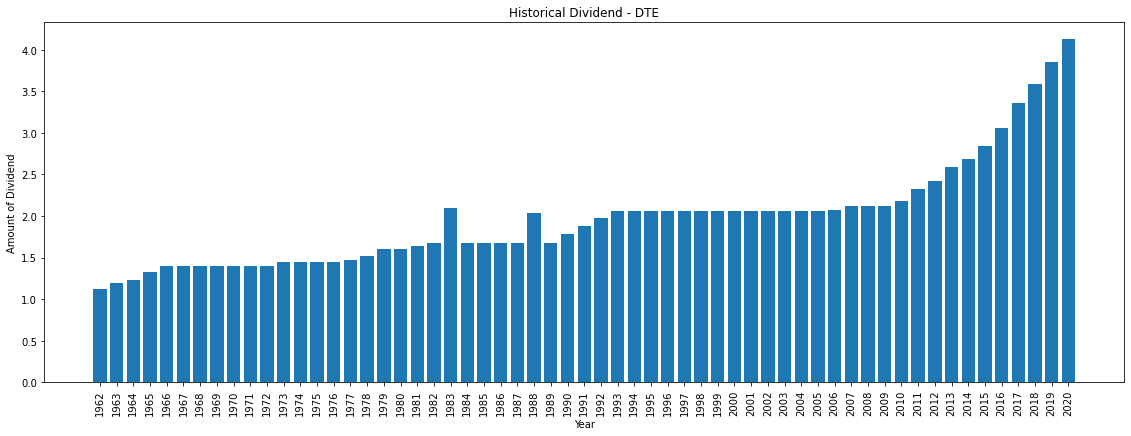

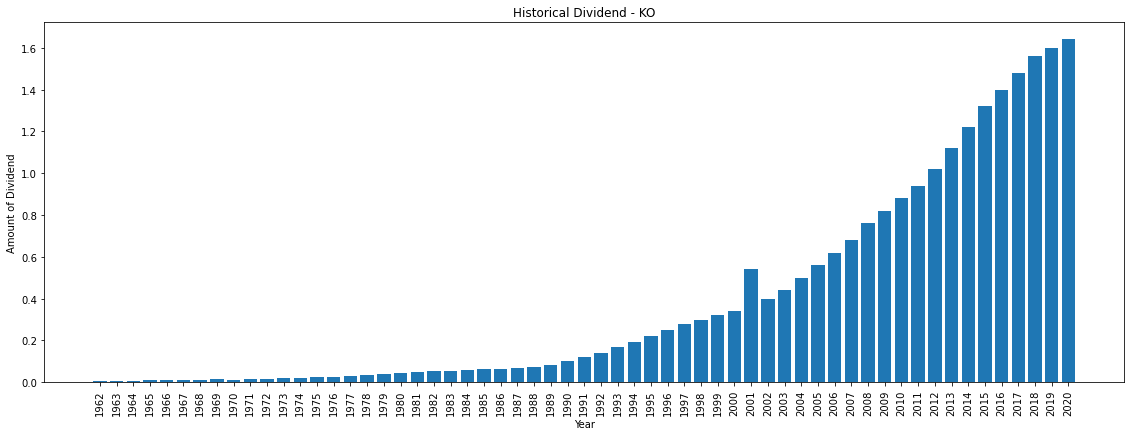

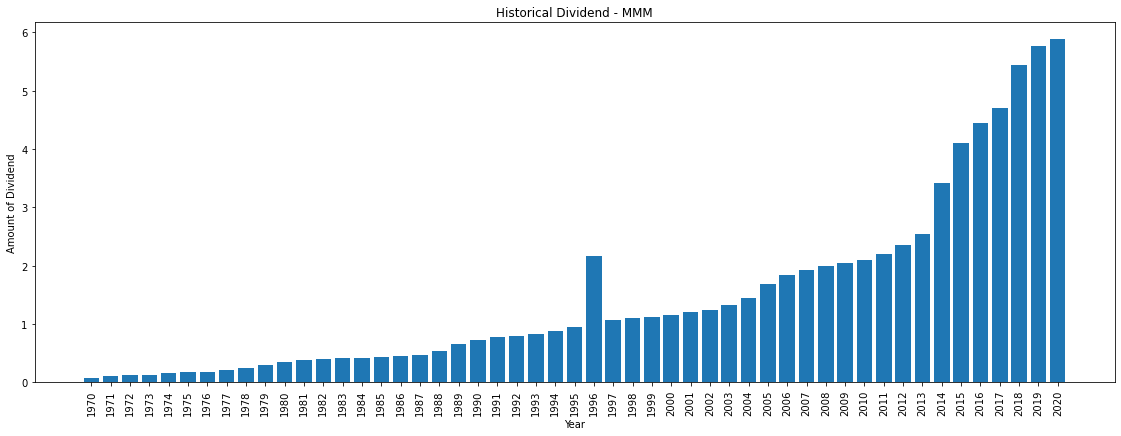

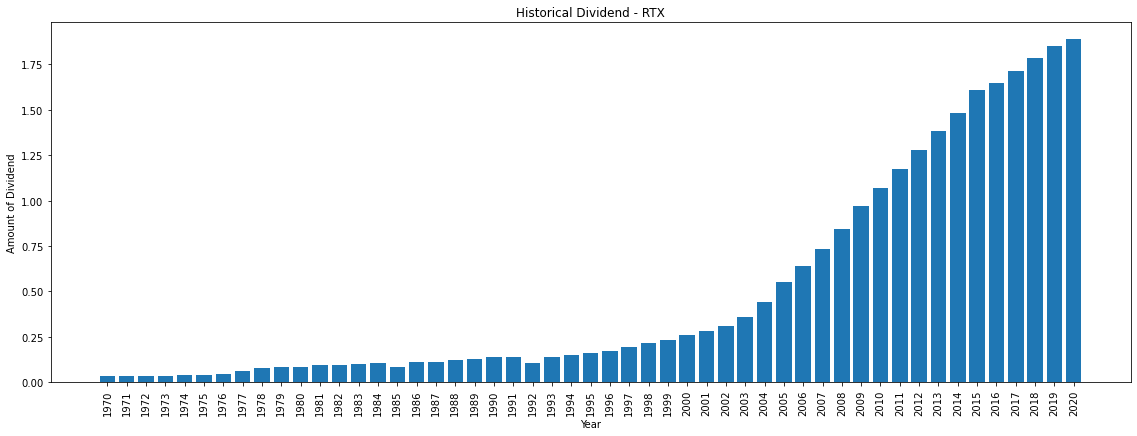

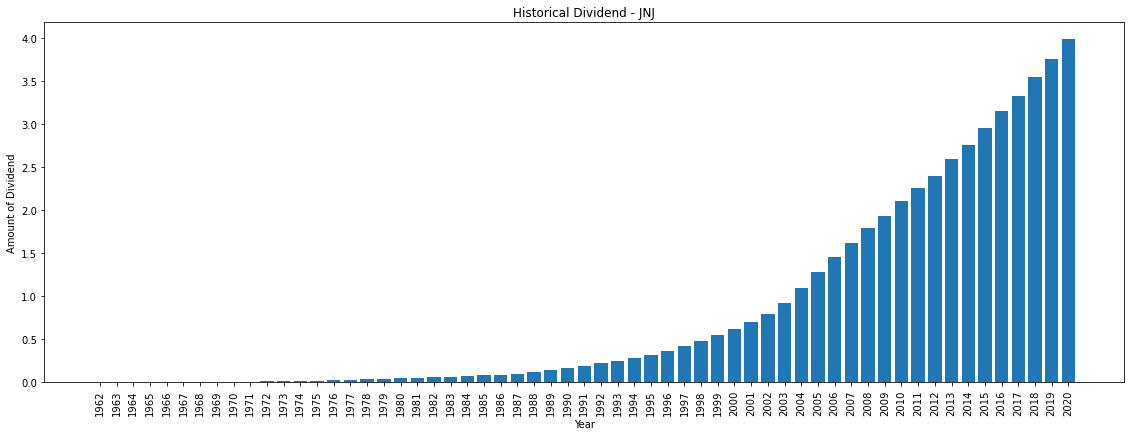

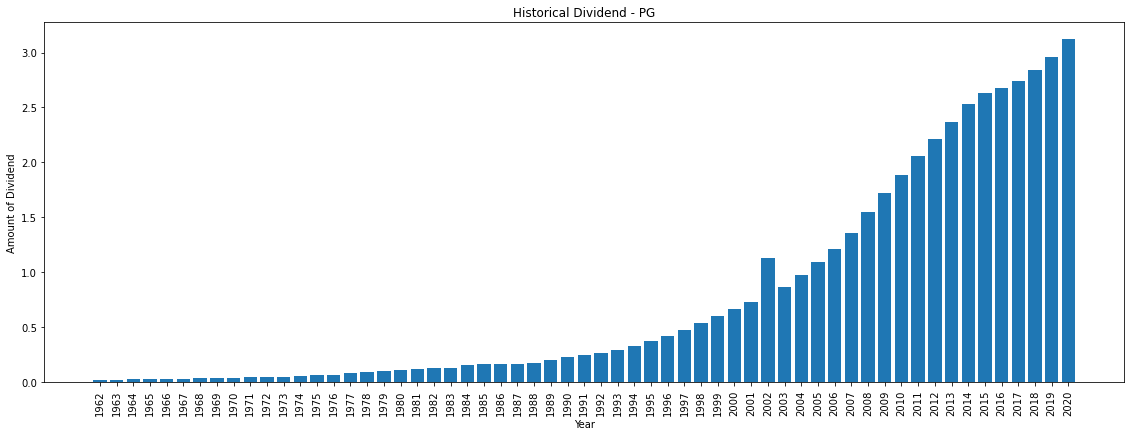

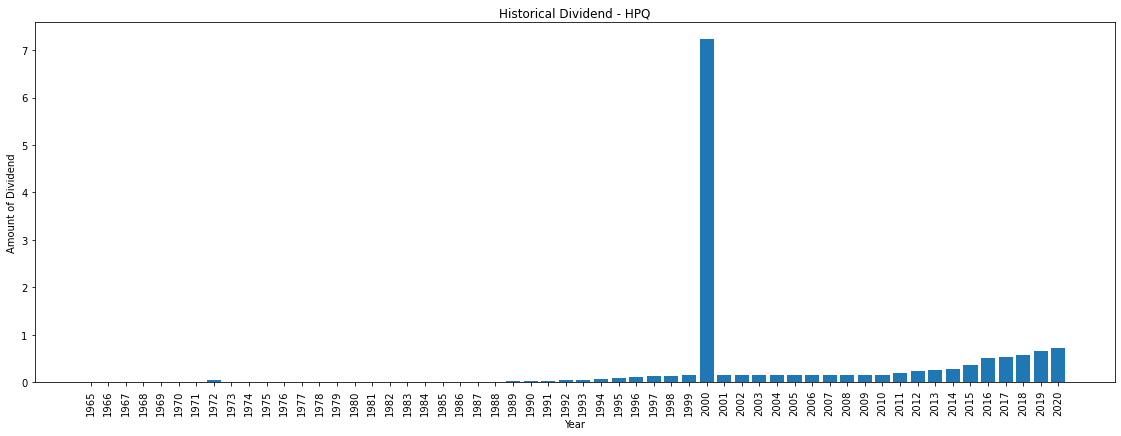

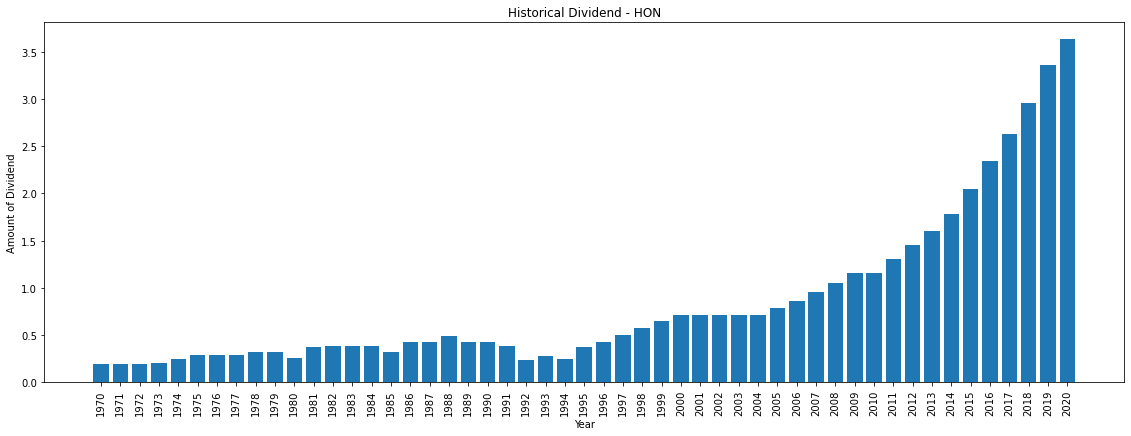

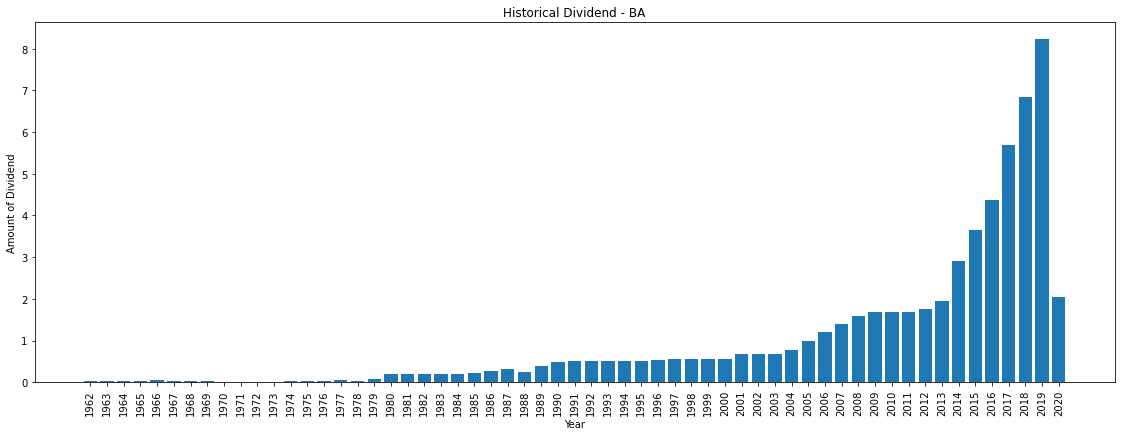

In [22]:
for symbol in div_kings.index:
    x_value = [i for i in div_data[symbol][0].keys()]
    y_value = [i for i in div_data[symbol][0].values()]

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x_value,y_value)
    plt.title('Historical Dividend - ' + symbol)
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.ylabel('Amount of Dividend')
    plt.show()